# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [2]:
cancer_df=pd.read_csv("breast-cancer-wisconsin-data.csv")
cancer_df.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [4]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [5]:
cancer_df.shape

(699, 11)

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [6]:
cancer_df.duplicated().value_counts()

False    691
True       8
dtype: int64

In [7]:
cancer_df.drop_duplicates(keep='first', inplace=True)

In [8]:
cancer_df.duplicated().value_counts()

False    691
dtype: int64

In [9]:
cancer_df.drop(columns="ID", inplace=True)
cancer_df.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [10]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column
cancer_df.isnull().head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [11]:
cancer_df.loc[cancer_df["Bare Nuclei"]=="?"]

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
23,8,4,5,1,2,?,7,3,1,4
40,6,6,6,9,6,?,7,8,1,2
139,1,1,1,1,1,?,2,1,1,2
145,1,1,3,1,2,?,2,1,1,2
158,1,1,2,1,3,?,1,1,1,2
164,5,1,1,1,2,?,3,1,1,2
235,3,1,4,1,2,?,3,1,1,2
249,3,1,1,1,2,?,3,1,1,2
275,3,1,3,1,2,?,2,1,1,2
292,8,8,8,1,2,?,6,10,1,4


In [12]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
cancer_df["Bare Nuclei"].value_counts()

1     397
10    130
5      30
2      30
3      28
8      20
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

There are 16 rows which contain the **"?"** value.

In [13]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values
cancer_df["Bare Nuclei"].replace(to_replace="?", value=1, inplace=True)

In [14]:
cancer_df["Bare Nuclei"]= pd.to_numeric(cancer_df["Bare Nuclei"])

In [15]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 691 non-null int64
Cell Size                      691 non-null int64
Cell Shape                     691 non-null int64
Marginal Adhesion              691 non-null int64
Single Epithelial Cell Size    691 non-null int64
Bare Nuclei                    691 non-null int64
Normal Nucleoli                691 non-null int64
Bland Chromatin                691 non-null int64
Mitoses                        691 non-null int64
Class                          691 non-null int64
dtypes: int64(10)
memory usage: 59.4 KB


In [16]:
cancer_df["Bare Nuclei"].value_counts()

1     413
10    130
5      30
2      30
3      28
8      20
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [17]:
# Check for correlation of variable
cancer_df.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.643340,0.653752,0.487949,0.517448,0.590841,0.561076,0.535712,0.350354,0.716938
Cell Size,0.643340,1.000000,0.905420,0.713117,0.747111,0.684791,0.759525,0.727239,0.460064,0.817720
Cell Shape,0.653752,0.905420,1.000000,0.690989,0.714393,0.704382,0.738455,0.724693,0.440592,0.817693
Marginal Adhesion,0.487949,0.713117,0.690989,1.000000,0.608477,0.672719,0.669813,0.602453,0.417167,0.701371
Single Epithelial Cell Size,0.517448,0.747111,0.714393,0.608477,1.000000,0.580709,0.620518,0.634058,0.482644,0.681233
Bare Nuclei,0.590841,0.684791,0.704382,0.672719,0.580709,1.000000,0.672687,0.578417,0.343020,0.816787
Normal Nucleoli,0.561076,0.759525,0.738455,0.669813,0.620518,0.672687,1.000000,0.669059,0.343821,0.756618
Bland Chromatin,0.535712,0.727239,0.724693,0.602453,0.634058,0.578417,0.669059,1.000000,0.427644,0.715540
Mitoses,0.350354,0.460064,0.440592,0.417167,0.482644,0.343020,0.343821,0.427644,1.000000,0.424111
Class,0.716938,0.817720,0.817693,0.701371,0.681233,0.816787,0.756618,0.715540,0.424111,1.000000


In [18]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables


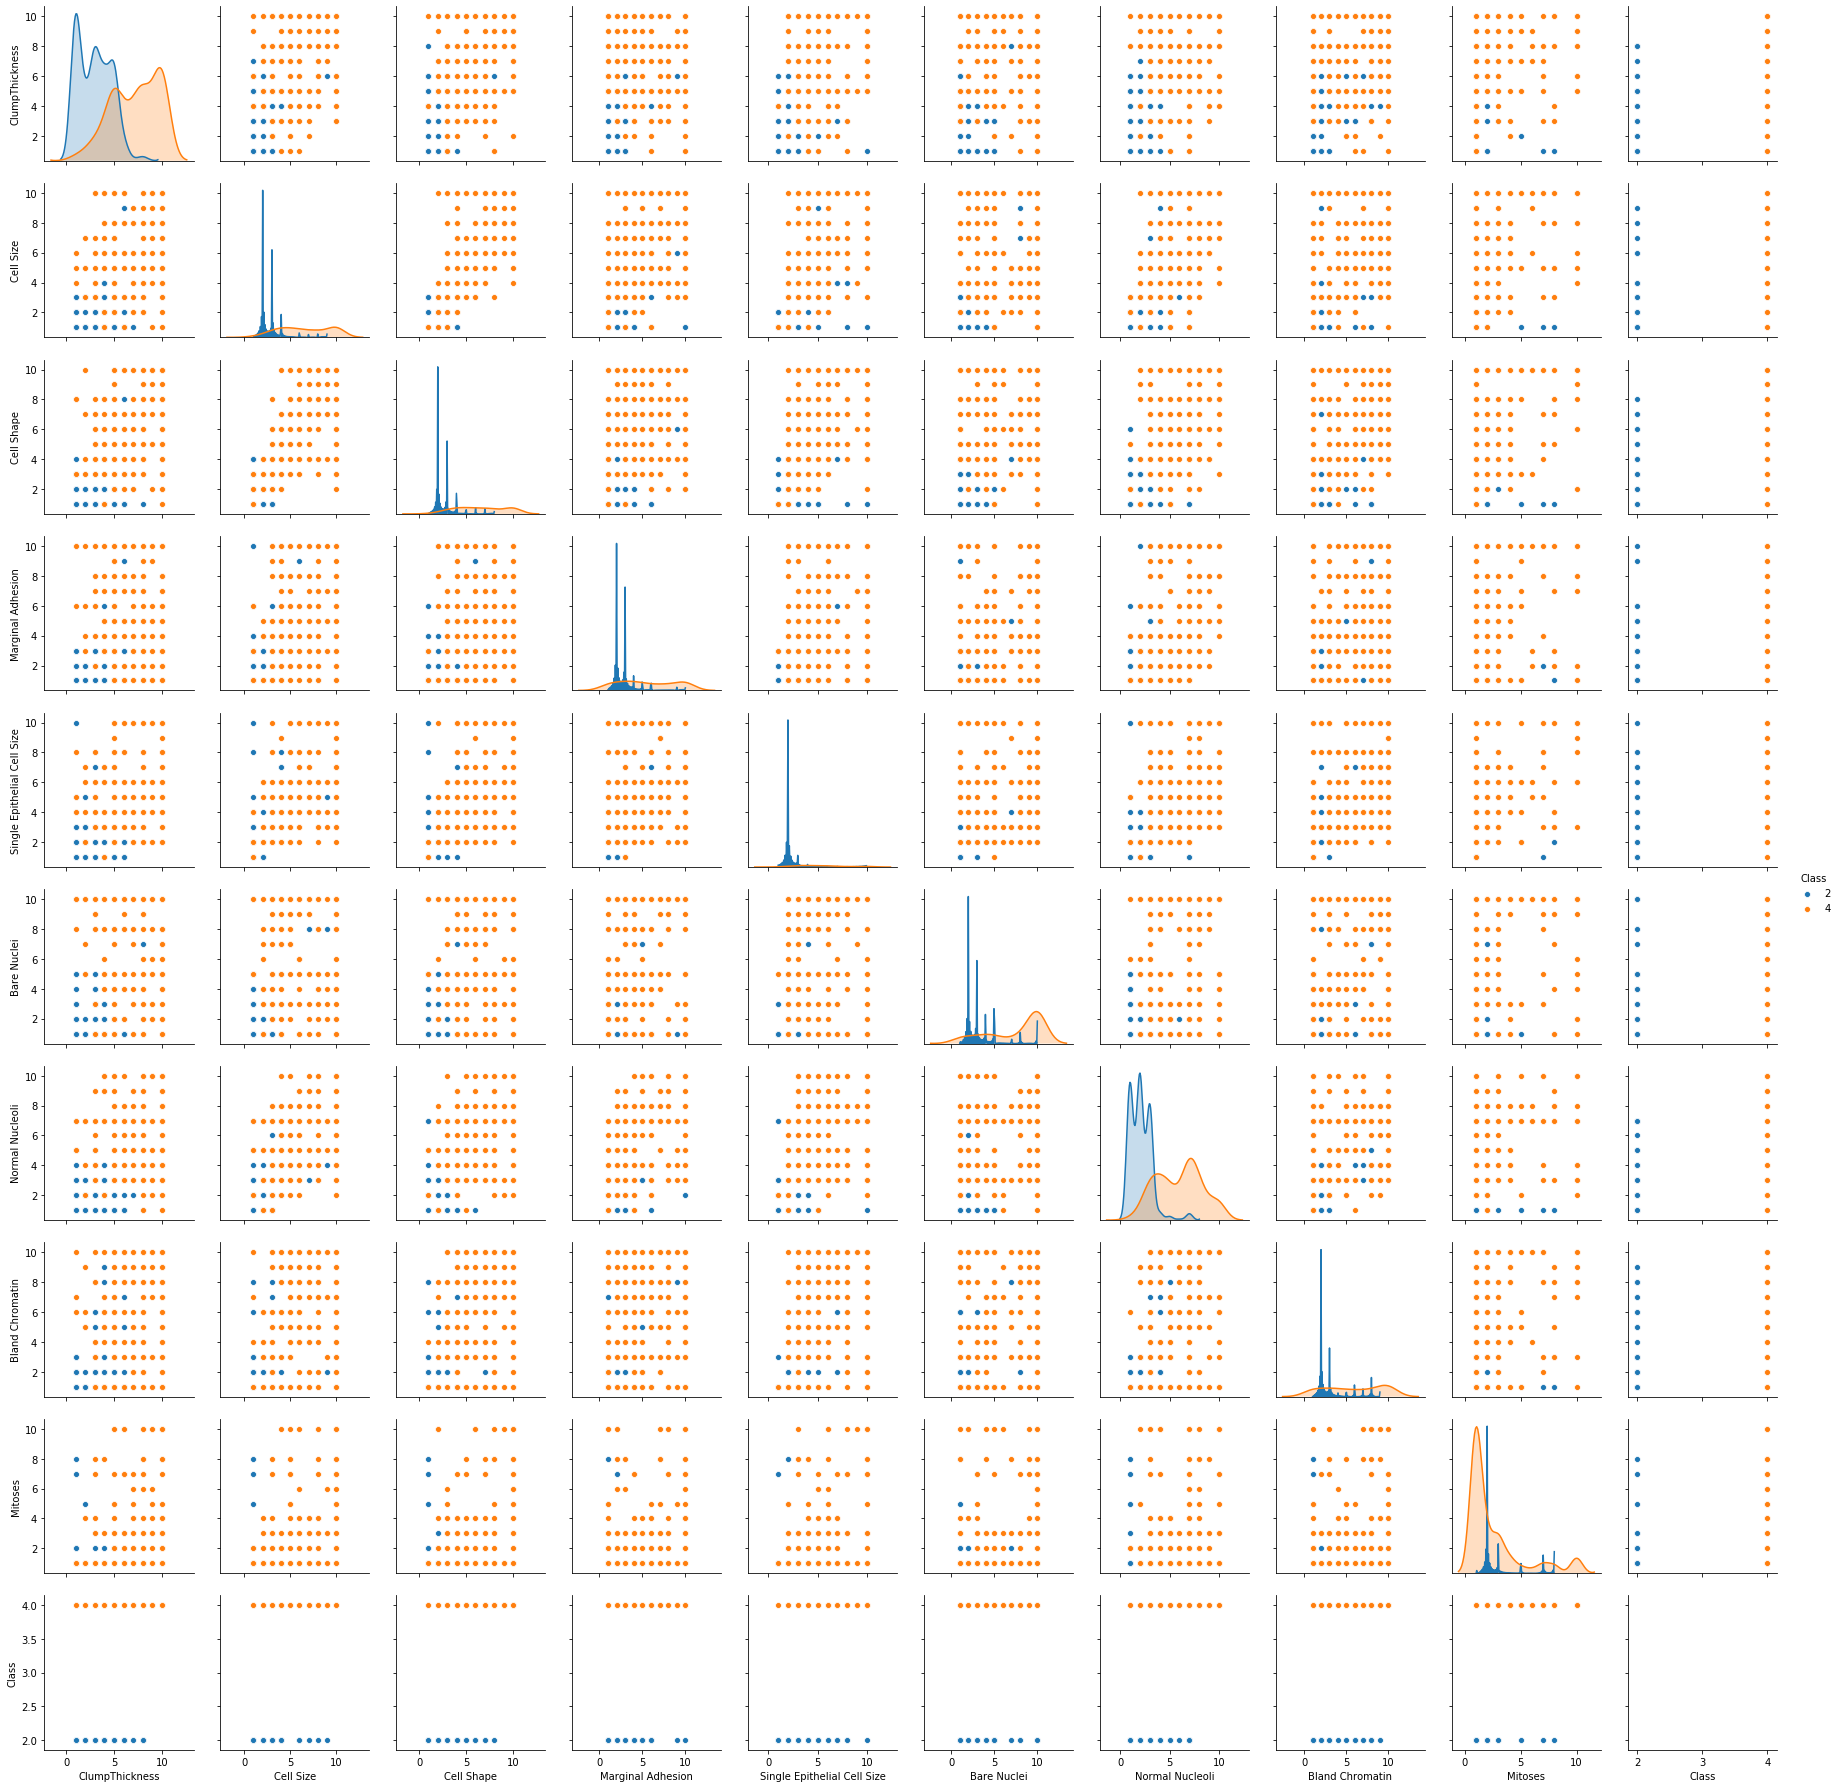

In [19]:
#Let us check for pair plots
sns.pairplot(hue="Class", data=cancer_df)

In [20]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

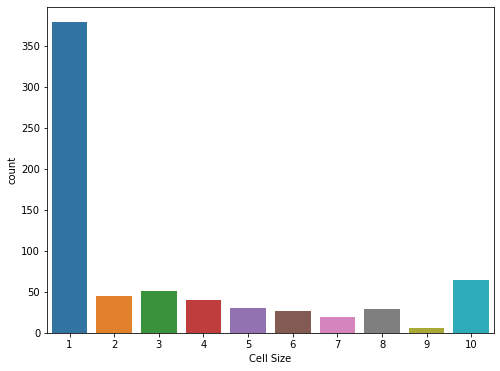

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Cell Size", data=cancer_df)

The value **"1"** is most appeared value in this column.

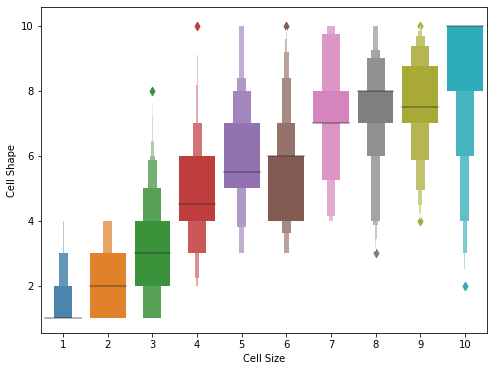

In [22]:
plt.figure(figsize=(8, 6))
sns.boxenplot(x="Cell Size", y= "Cell Shape", data=cancer_df)

Cell size **3**, **4**, **6**, **8**, **9** and **10** has the outliers.

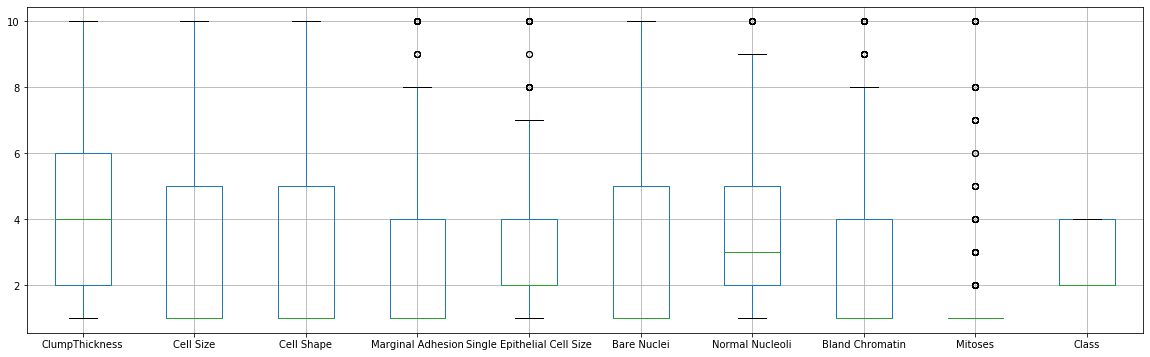

In [23]:
cancer_df.boxplot(figsize=(20,6))

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [24]:
pd.crosstab(cancer_df['Marginal Adhesion'],cancer_df['Class'])

Class,2,4
Marginal Adhesion,,
1,370,31
2,37,19
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [25]:
cancer_df['Marginal Adhesion'] = np.where(cancer_df['Marginal Adhesion']>8,6,cancer_df['Marginal Adhesion'])

In [26]:
pd.crosstab(cancer_df['Single Epithelial Cell Size'],cancer_df['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,44,1
2,360,23
3,29,42
4,7,41
5,5,34
6,2,39
7,3,9
8,2,18
9,0,2


In [27]:
cancer_df['Single Epithelial Cell Size'] = np.where(cancer_df['Single Epithelial Cell Size']>8,4,cancer_df['Single Epithelial Cell Size'])

In [28]:
pd.crosstab(cancer_df['Normal Nucleoli'],cancer_df['Class'])

Class,2,4
Normal Nucleoli,,
1,149,2
2,158,7
3,126,35
4,8,32
5,4,30
6,1,9
7,7,64
8,0,28
9,0,11


In [29]:
cancer_df['Normal Nucleoli'] = np.where(cancer_df['Normal Nucleoli']>9,7,cancer_df['Normal Nucleoli'])

In [30]:
pd.crosstab(cancer_df['Bland Chromatin'],cancer_df['Class'])

Class,2,4
Bland Chromatin,,
1,397,40
2,30,6
3,12,30
4,1,17
5,2,17
6,4,18
7,2,14
8,4,20
9,1,15


In [31]:
cancer_df['Bland Chromatin'] = np.where(cancer_df['Bland Chromatin']>8,7,cancer_df['Bland Chromatin'])

In [32]:
pd.crosstab(cancer_df['Mitoses'],cancer_df['Class'])

Class,2,4
Mitoses,,
1,440,132
2,8,27
3,2,30
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [33]:
cancer_df['Mitoses'] = np.where(cancer_df['Mitoses']>3,3,cancer_df['Mitoses'])

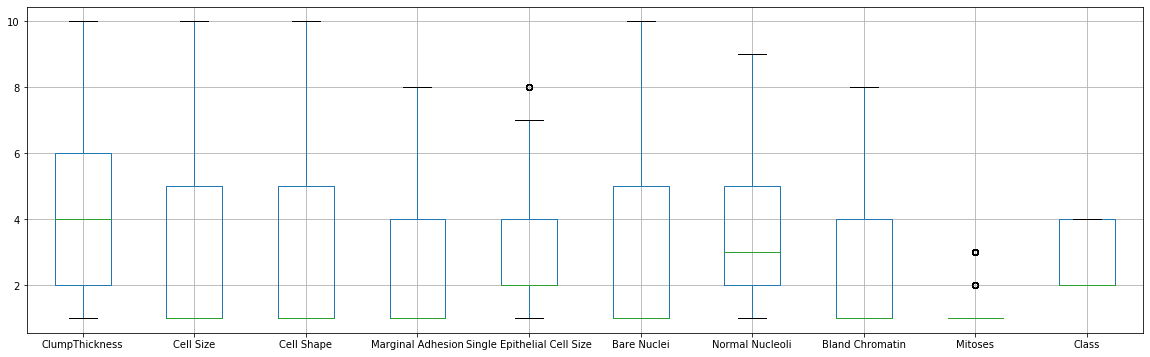

In [34]:
cancer_df.boxplot(figsize=(20,6))

In [35]:
# We could see most of the outliers are now removed.

In [36]:
X = cancer_df.drop(columns="Class").values
y = cancer_df["Class"].values

In [37]:
from scipy.stats import zscore
X_scaled= zscore(X)
X_scaled

array([[ 0.2036669 , -0.70094014, -0.74420166, ..., -0.15490351,
        -0.65020522, -0.43764638],
       [ 0.2036669 ,  0.28618548,  0.27008502, ..., -0.15490351,
        -0.23649269, -0.43764638],
       [-0.50711   , -0.70094014, -0.74420166, ..., -0.15490351,
        -0.65020522, -0.43764638],
       ...,
       [ 0.2036669 ,  2.26043672,  2.29865838, ...,  2.06580869,
         1.83206995,  1.05207604],
       [-0.15172155,  1.60235298,  0.94627614, ...,  1.62166625,
         1.41835743, -0.43764638],
       [-0.15172155,  1.60235298,  1.62246726, ...,  1.62166625,
         0.59093237, -0.43764638]])

# Q6 Create a covariance matrix for identifying Principal components

In [38]:
cov_matrix = np.cov(X_scaled.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00144928 0.64427196 0.65469961 0.51319284 0.50763027 0.59169728
  0.57237861 0.55218158 0.42763818]
 [0.64427196 1.00144928 0.90673173 0.73361758 0.73002732 0.68578334
  0.74989858 0.73027209 0.51118074]
 [0.65469961 0.90673173 1.00144928 0.70469367 0.70651332 0.7054026
  0.7298165  0.72299697 0.48189033]
 [0.51319284 0.73361758 0.70469367 1.00144928 0.63590003 0.6893729
  0.69157789 0.64680878 0.44191803]
 [0.50763027 0.73002732 0.70651332 0.63590003 1.00144928 0.60509478
  0.62323903 0.6773858  0.4647828 ]
 [0.59169728 0.68578334 0.7054026  0.6893729  0.60509478 1.00144928
  0.68938126 0.60966152 0.45280669]
 [0.57237861 0.74989858 0.7298165  0.69157789 0.62323903 0.68938126
  1.00144928 0.6823245  0.40197543]
 [0.55218158 0.73027209 0.72299697 0.64680878 0.6773858  0.60966152
  0.6823245  1.00144928 0.49212276]
 [0.42763818 0.51118074 0.48189033 0.44191803 0.4647828  0.45280669
  0.40197543 0.49212276 1.00144928]]


# Q7 Identify eigen values and eigen vector

In [39]:
# Step 2- Get eigen values and eigen vector

In [40]:
e_vals, e_vecs = np.linalg.eig(cov_matrix)
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Eigenvectors 
[[-0.30105396  0.04504731 -0.85310588  0.00705587 -0.20421858  0.18388717
  -0.29142296 -0.11457294 -0.07696626]
 [-0.37424201 -0.07728842  0.02559006  0.73102107 -0.19283898 -0.14886209
   0.17354755  0.4788674  -0.01196823]
 [-0.3701093  -0.109803   -0.04481999 -0.66764037 -0.19289772 -0.32552827
   0.24381092  0.44651862 -0.03477195]
 [-0.33782112 -0.15939437  0.24622633 -0.06786127  0.43920227  0.13706905
  -0.70905419  0.27538432 -0.07040487]
 [-0.33112771 -0.00669051  0.37099044 -0.04139072 -0.41799396  0.3233866
   0.03502261 -0.31225265 -0.61068522]
 [-0.33522096 -0.11253624 -0.13144624  0.08866286  0.58693234 -0.41018027
   0.28512814 -0.41034468 -0.29564344]
 [-0.3432574  -0.260495    0.0275146  -0.0606482   0.19123297  0.62107005
   0.3974858  -0.08136693  0.47219473]
 [-0.34022731  0.01564755  0.21963914  0.02450976 -0.32473606 -0.38910642
  -0.27354582 -0.45143112  0.54743379]
 [-0.25021294  0.93473115  0.0707732  -0.036829    0.17253306  0.09649063
   0.0860

# Q8 Find variance and cumulative variance by each eigen vector

Cumulative Variance Explained [ 66.92910033  74.54248464  80.56391977  85.48744375  89.30966042
  92.83963068  96.05816922  99.00358315 100.        ]


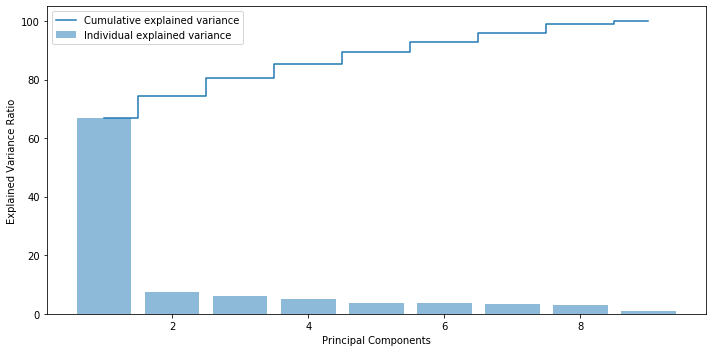

In [41]:
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
data_reduced = pca.fit_transform(X_scaled)
data_reduced.transpose()

array([[-1.51355098,  1.84757882, -1.63475279, ...,  4.21124491,
         2.13400757,  2.55517762],
       [-0.04235199, -0.82182586, -0.10551766, ...,  0.01602373,
        -1.17310567, -1.36991714],
       [-0.62869553,  0.70566234, -0.05870845, ...,  1.31097621,
         0.62276959,  0.71555297],
       [ 0.12518049, -0.3615587 , -0.18242088, ...,  1.94757672,
         0.3075589 ,  0.05684399],
       [-0.15968084,  2.39129356, -0.13256031, ..., -0.43698019,
        -1.35542166, -0.39176398],
       [ 0.15014342,  0.87170622,  0.18228029, ..., -0.51881562,
        -0.52438577, -1.02432524]])

# Q10 Find correlation between components and features

In [43]:
pca.components_

array([[ 0.30105396,  0.37424201,  0.3701093 ,  0.33782112,  0.33112771,
         0.33522096,  0.3432574 ,  0.34022731,  0.25021294],
       [ 0.04504731, -0.07728842, -0.109803  , -0.15939437, -0.00669051,
        -0.11253624, -0.260495  ,  0.01564755,  0.93473115],
       [-0.85310588,  0.02559006, -0.04481999,  0.24622633,  0.37099044,
        -0.13144624,  0.0275146 ,  0.21963914,  0.0707732 ],
       [ 0.20421858,  0.19283898,  0.19289772, -0.43920227,  0.41799396,
        -0.58693234, -0.19123297,  0.32473606, -0.17253306],
       [ 0.07696626,  0.01196823,  0.03477195,  0.07040487,  0.61068522,
         0.29564344, -0.47219473, -0.54743379, -0.06909354],
       [ 0.11457294, -0.4788674 , -0.44651862, -0.27538432,  0.31225265,
         0.41034468,  0.08136693,  0.45143112, -0.07777235]])

<Figure size 2160x720 with 0 Axes>

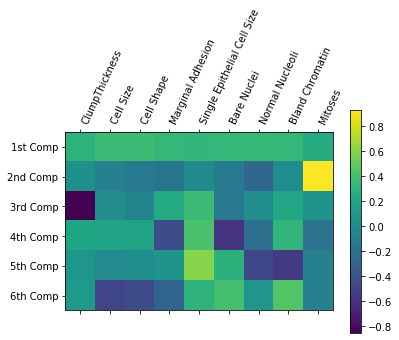

In [44]:
plt.figure(figsize=(30 , 10))
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2,3,4,5],['1st Comp','2nd Comp','3rd Comp', '4th Comp','5th Comp', '6th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(cancer_df.drop(columns="Class").columns)),cancer_df.columns,rotation=65,ha='left')
plt.tight_layout()
plt.show()

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [45]:
jokes_df= pd.read_csv("jokes.csv")
jokes_df.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [46]:
ratings= jokes_df.drop(columns="NumJokes", axis=1).head(200)
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q13 Change the column indices from 0 to 99

In [47]:
ratings.columns = range(0,100)
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q14 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [48]:
ratings.replace(99, 0, inplace=True)
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q15 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [49]:
ratings_t = ratings.T
ratings_t.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-7.82,4.08,0.00,0.00,8.50,-6.17,0.00,6.84,-3.79,3.01,...,3.54,4.47,8.06,1.84,-9.71,5.73,1.80,2.62,0.00,5.58
1,8.79,-0.29,0.00,8.35,4.61,-3.54,0.00,3.16,-3.54,5.15,...,-6.70,-0.19,3.45,-2.23,-8.25,0.00,5.39,-3.79,0.00,-7.28
2,-9.66,6.36,0.00,0.00,-4.17,0.44,0.00,9.17,-9.42,5.15,...,-4.76,1.55,3.69,5.49,-8.30,-0.58,8.06,-1.17,0.00,-4.56
3,-8.16,4.37,0.00,0.00,-5.39,-8.50,0.00,-6.21,-6.89,3.01,...,0.00,-1.50,-1.36,5.49,-2.62,1.75,-0.10,-0.44,0.00,2.67
4,-7.52,-2.38,9.03,1.80,1.36,-7.09,8.59,-8.16,-8.74,6.41,...,-8.16,-4.42,3.93,4.37,-8.93,2.86,4.81,-1.02,7.91,7.38


In [50]:
from sklearn.preprocessing import StandardScaler
ratings_diff = StandardScaler().fit_transform(ratings_t)
ratings_t.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-7.82,4.08,0.00,0.00,8.50,-6.17,0.00,6.84,-3.79,3.01,...,3.54,4.47,8.06,1.84,-9.71,5.73,1.80,2.62,0.00,5.58
1,8.79,-0.29,0.00,8.35,4.61,-3.54,0.00,3.16,-3.54,5.15,...,-6.70,-0.19,3.45,-2.23,-8.25,0.00,5.39,-3.79,0.00,-7.28
2,-9.66,6.36,0.00,0.00,-4.17,0.44,0.00,9.17,-9.42,5.15,...,-4.76,1.55,3.69,5.49,-8.30,-0.58,8.06,-1.17,0.00,-4.56
3,-8.16,4.37,0.00,0.00,-5.39,-8.50,0.00,-6.21,-6.89,3.01,...,0.00,-1.50,-1.36,5.49,-2.62,1.75,-0.10,-0.44,0.00,2.67
4,-7.52,-2.38,9.03,1.80,1.36,-7.09,8.59,-8.16,-8.74,6.41,...,-8.16,-4.42,3.93,4.37,-8.93,2.86,4.81,-1.02,7.91,7.38


In [51]:
ratings_diff.shape

(100, 200)

### Popularity based recommendation system

# Q16  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [52]:
ratings_mean = ratings_diff.mean(axis=1)
ratings_mean

array([-0.00750712, -0.04599906, -0.10707627, -0.32946024, -0.17790901,
        0.14416335, -0.14245948, -0.2529505 , -0.14446555,  0.07500963,
        0.12692589,  0.13623836, -0.49106203,  0.30513406, -0.57306865,
       -0.92386158, -0.49712044, -0.37160086, -0.11704844, -0.39704547,
        0.44163283,  0.07538555, -0.1050732 , -0.42382901, -0.02252966,
        0.08707342,  0.60972362,  0.10289024,  0.6642304 , -0.35885747,
        0.50249102,  0.52189075, -0.19274273,  0.07743073,  0.69230389,
        0.75197178, -0.29936982,  0.0751037 ,  0.05124105, -0.01323282,
       -0.21815835,  0.37486252, -0.29597156, -0.45711105, -0.03619337,
        0.31489334,  0.17736473,  0.18280502,  0.5320071 ,  0.87821678,
       -0.22012481, -0.02494807,  0.73670016,  0.31614636,  0.05310318,
        0.41407327, -0.39348134, -0.7217115 , -0.19241029, -0.16650425,
        0.39273193,  0.55754984, -0.08241105, -0.37911416,  0.49532245,
        0.39250225, -0.19756691,  0.40890015,  0.47513885, -0.06

In [53]:
mean=pd.DataFrame(ratings_diff.mean(axis=1))
mean[0].sort_values(ascending=False).head(10)

49    0.878217
35    0.751972
52    0.736700
34    0.692304
28    0.664230
26    0.609724
61    0.557550
48    0.532007
31    0.521891
30    0.502491
Name: 0, dtype: float64